# Linear Regression <a id="LinearRegression"></a> 

The linear regression model is one of the most simple algorithms used in ML. To a set of inputs, it predicts which output is expected. A simple regression model can be written as:

$$\hat{y} = \theta_{0} + \theta_{1}x_{1}$$

In this case, $\hat{y}$ is the predicted value, with $\theta_{0}$ being the bias and $\theta_{1}$ the first parameter of the model. $x_{1}$ is the first feature value. Linear regression models can have more than one feature values, and to $n$ feature values, it can be rewritten as:

$$\hat{y} = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \theta_{3}x_{3} + ... + \theta_{n}x_{n}$$

This expression can be simplified to its vectorized form:

$$\hat{y} = \theta^{T} \cdot x$$

The vector $\theta$ contains all the parameters that compose the linear regression model, so that $\theta^{T} = [\theta_{0}, \theta_{1}, \theta_{2}, \theta_{3}, ..., \theta_{n}]$. It is a vector with shape $[1, n + 1]$ because of the transposition which is necessary to perform the dot product between the $\theta$ values and the $x$ values, which is of shape $[n + 1, 1]$. The result of this product is then a single value, $\hat{y}$. In this example, the vector $x$ contains all the instances with $x_{0} = 1$, so that the bias term $\theta_{0}$ is always independent. Then, $x$ would be $x = [1, x_{1}, x_{2}, x_{3}, ..., x_{n}]$.

The most common loss function used in regression models is the Root Mean Square Error (RMSE). However, to make calculations easier, the Mean Square Error (MSE) is commonly used in linear regression functions, while obtaining the same results as those obtained using the RMSE since the feature values that obtain the minimal error to RMSE are the same that obtain the minimal error to MSE.

The MSE can be calculated as:

$$ MSE = \frac{1}{m} \sum^{m}_{i = 1} (\theta^{T} \cdot x^{(i)} - y^{(i)})^{2} $$

It is important to note that while $\hat{y}^{(i)}$ represents the value predicted by the model, $y^{(i)}$ corresponds to the true value associated with inputs $x^{(i)}$.

The optimal $\theta$, labeled as $\theta^{*}$, corresponds to the set of parameters that results on the smallest MSE. In this case, since our loss function (the value we seek to minimize), it can be written as:

$$\theta^{*} = \text{arg$_{\theta}$min MSE} = \text{arg$_{\theta}$min} (\frac{1}{m} \sum^{m}_{i = 1} (\theta^{T} \cdot x^{(i)} - y^{(i)})^{2})$$

The point where the loss value is minimal can be determined as the point in which the derivative is equal to zero. Therefore:

$$
\begin{aligned}
\frac{\partial MSE}{\partial \theta} = 0 \\
\Leftrightarrow \frac{\partial (\frac{1}{m} \sum^{m}_{i = 1} (\theta^{T} \cdot x^{(i)} - y^{(i)})^{2})}{\partial \theta} = 0
\end{aligned}
$$

If we handle $\theta$ as a variable, as done in calculus, instead of a vector, it is possible to simplify the equation as:

$$ 
\begin{aligned}
\frac{1}{m} \sum^{m}_{i = 1} -2(y_{i} - \hat{\theta} x_{i})x_{i} = 0 \\
\Leftrightarrow -\frac{2}{m} \sum^{m}_{i = 1} (y_{i} - \hat{\theta} x_{i})x_{i} = 0 \\
\Leftrightarrow \hat{\theta} \sum^{m}_{i = 1} x_{i}^{2} - \sum^{m}_{i = 1} x_{i}y_{i} = 0 \\
\Leftrightarrow \hat{\theta} = \frac{\sum^{m}_{i = 1} x_{i}y_{i}}{\sum^{m}_{i = 1} x_{i}^{2}} \\
\Leftrightarrow \hat{\theta} = (X^{T} \cdot X)^{-1} \cdot X^{T} \cdot y
\end{aligned}
$$

In this equation, The Normal Equation, $\hat{\theta}$ is the set of parameters $\theta$ that minimize the loss function, for a set of target values $y$. It is important to note what each symbol means in these equations:

$$
x^{(1)} = 
\begin{pmatrix}
    1.0256\\
    120.25\\
    -52.36
\end{pmatrix}
$$
$$
X = 
\begin{pmatrix}
    (x^{(1)})^T\\
    (x^{(2)})^T\\
    \vdots
\end{pmatrix}
=
\begin{pmatrix}
    1.0256 & 120.25 & -52.36\\
    \vdots & \vdots & \vdots
\end{pmatrix}
$$



Now, to visualize the linear regression obtained using the normal equations, we are importing NumPy and PyPlot. Using NumPy, we will create a random set of 100 values generated through a uniform distribution between 0 and 1. Every value in this set will then be multiplied by 2 to span between 0 and 2. Then, the y function will multiply it by 3 and sum 4. In a linear regression, this would be, respectively, the slope and the intercept. Random noise (values between 0 and 1, generated through a normal distribution) are summed to the function.

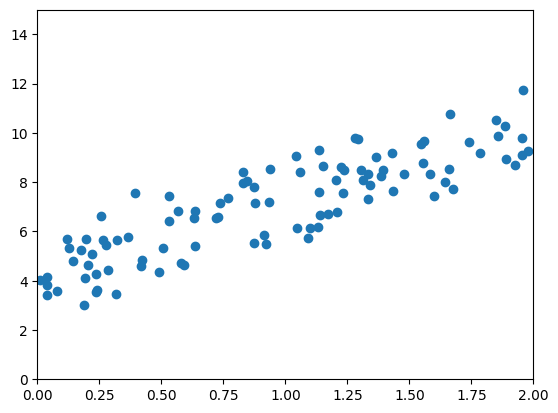

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.axis([0,2, 0,15])
plt.scatter(X, y)
plt.show()

The objective is to compute the slope and interception using the normal equation for this data. As seen above, X must be changed to include the $x_{0}=1$ term. Then, the normal equation is applied.

In [3]:
X_ = np.c_[np.ones((100, 1)), X]
theta = np.linalg.inv(X_.T.dot(X_)).dot(X_.T).dot(y)

print(f"Intersection: {theta[0][0]:.2f}")
print(f"Slope: {theta[1][0]:.2f}")


Intersection: 4.22
Slope: 2.97


We obtained $\theta_{0} = 4.22$ and $\theta_{1} = 2.97$. It is observed that the values are similar to the ones that originated the data, which were $\theta_{0} = 4$ and $\theta_{1} = 3$. In fact, the only reason they are not exactly the same is because of the Gaussian noise that was added. Now, let's compare the values obtained with our implementation to the ones obtained using the Scikit-Learn library.

In [4]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X_, y)

print(f"Intersection: {linear_regression.intercept_[0]:.2f}")
print(f"Slope: {linear_regression.coef_[0][1]:.2f}")

Intersection: 4.22
Slope: 2.97


It resulted exactly in the same result, as expected. We can plot the line resulting from the equation $\hat{y} = \hat{\theta}x$, and visualize how it represents the randomly generated data. For that, we will predict the data at the two extreme points ($x=0$ and $x=2$) and draw a line between them.

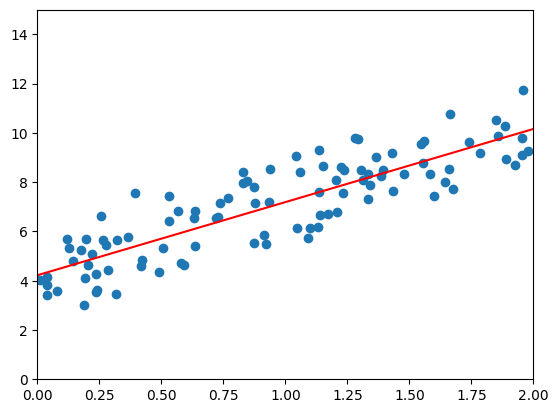

In [5]:
X_new = np.array([[0], [2]])
X_new_ = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_.dot(theta)

plt.axis([0,2, 0,15])
plt.plot(X_new, y_predict, "red")
plt.scatter(X, y)
plt.show()

# Gradient Descent <a id="GradientDescent"></a> 

## Batch Gradient Descent

The inversion of matrixes performed in Linear Regression presents a time complexity high enough to signficantly slow down the training of the model. Therefore, it is common to employ methods that are less complex but still reach a a set of parameters that minimize the cost function. Gradient Descent is one of them. 

Gradient Descent consists of an iterative tweaking of parameters to reduce the loss value. It starts by randomly initializing these parameters and calculating the local gradient of the loss function with regards to the intitialized $\theta$ values. The parameters are then tweaked in the direction that causes a reduction in the gradient. When this gradient reaches zero, a minimum has been reached. The parameter tweaking is done using a value named *learning rate*. The learning rate defines how much the parameters will be changed. A learning rate too small will lead to a longer time until the minimum is found and a learning rate to big may lead to never reaching the minimum loss.

But how can Gradient Descent be applied to linear regression and does that actually work? Let's start by referring to the slope and the intercept as our parameters, represented by $\theta$. These parameters are, as seen above, tweaked to reach the most optimal loss value in gradient descent, which is applied to many more models than just linear regression. In the beginning of gradient descent, our parameters are randomly initialized, which means that random values are to them attributed. Then, with the inputs in our data we apply the randomly initialized model to predict the outputs. It is expected that the values will not be similar, and the cost function will be far from the optimal value. For the same parameters, we calculate the gradient for each parameter. The gradient corresponds to the derivative of the loss function in respect to the parameter that is being calculated. Let's consider the same loss function (MSE). As seen previously, the MSE function is:

$$ MSE = \frac{1}{m} \sum^{m}_{i = 1} (\theta^{T} \cdot x^{(i)} - y^{(i)})^{2} $$

For this linear regression, considering $\theta = [\theta_{0}, \theta_{1}]$, we can rewrite MSE as:

$$ MSE = \frac{1}{m} \sum^{m}_{i = 1} ((\theta_{1} \cdot x_{i} + \theta_{0}) - y_{i})^{2} $$

From this, it is easier to calculate the two partial derivatives in respect to the two theta variables:

$$ 
\frac{\partial MSE}{\partial \theta_{0}} = \frac{2}{m} \sum^{m}_{i = 1} \left[\frac{\partial}{\partial \theta_{0}}\left[(\theta_{1} \cdot x_{i} + \theta_{0}) - y_{i}\right]\right]\left[(\theta_{1} \cdot x_{i} + \theta_{0}) - y_{i}\right] \\
\Leftrightarrow \frac{\partial MSE}{\partial \theta_{0}} = \frac{2}{m} \sum^{m}_{i = 1} \left[(\theta_{1} \cdot x_{i} + \theta_{0}) - y_{i}\right] \\
$$

$$ 
\frac{\partial MSE}{\partial \theta_{1}} = \frac{2}{m} \sum^{m}_{i = 1} \left[\frac{\partial}{\partial \theta_{1}}\left[(\theta_{1} \cdot x_{i} + \theta_{0}) - y_{i}\right]\right]\left[(\theta_{1} \cdot x_{i} + \theta_{0}) - y_{i}\right] \\
\Leftrightarrow \frac{\partial MSE}{\partial \theta_{1}} = \frac{2}{m} \sum^{m}_{i = 1} x_{i} \left[(\theta_{1} \cdot x_{i} + \theta_{0}) - y_{i}\right] \\
$$

We can rewrite the array that contains the gradients across all parameters as $\nabla_{\theta}MSE(\theta)$. The array of gradients represents the following:

$$ \nabla_{\theta}MSE(\theta) = 
\begin{pmatrix}
    \frac{\partial \theta}{\partial \theta_{0}}MSE(\theta)\\
    \frac{\partial \theta}{\partial \theta_{1}}MSE(\theta)\\
    \vdots
\end{pmatrix} =
\frac{2}{m} X^{T} \cdot (X \cdot \theta - y)
$$

After calculating these gradients, the parameters must be updated. This is done using the following equation for each parameter, where $\eta$ is the learning rate and $\theta^{*}$ represents the new values of the parameters in the following iteration:

$$ \theta^{*} = \theta - \eta \cdot \nabla_{\theta}MSE(\theta)$$

In this case, we are calculating the gradient for all parameters using all the data available. Therefore, we are performing **Batch Gradient Descent**, since the whole batch of training data is being used to fit the model in every step. As one can imagine, this becomes significantly slower when the training data increases significantly.

Now, we shall apply this principles for the same data as seen before and see how the results compare between different approaches. The initialization of weights can be done in multiple ways, but for now, we will just randomly select two floats between -1 and 1 for both parameters.

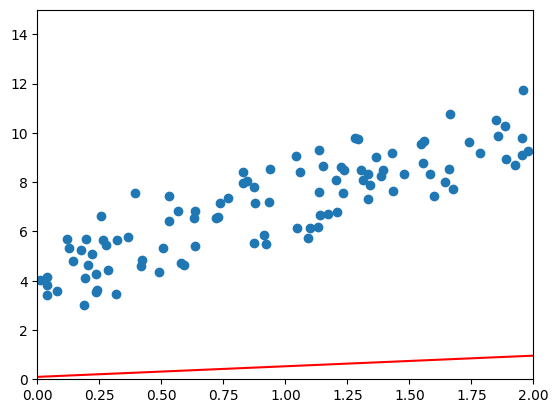

In [6]:
import numpy as np

np.random.seed(0)

random_theta = np.random.uniform(-1,1, [2,1])

X_new = np.array([[0], [2]])
X_new_ = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_.dot(random_theta)

plt.axis([0,2, 0,15])
plt.plot(X_new, y_predict, "red")
plt.scatter(X, y)
plt.show()


As expected, the line obtained was not very similar to the one with minimal MSE. So, let's update it using gradient descent:

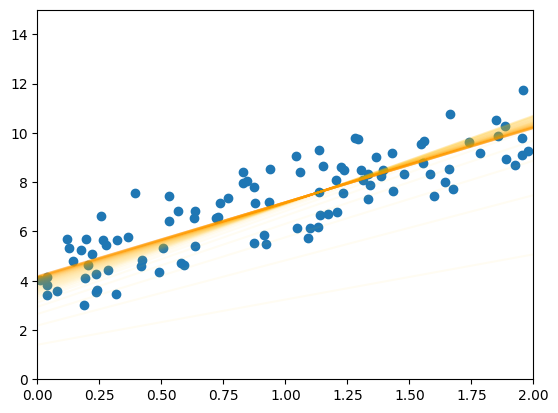

Intersection: 4.18
Slope: 3.00


In [7]:
import matplotlib as mpl

learning_rate = 0.1
n_iterations = 100
changing_theta = random_theta
m = X_.shape[0]

X_preview = np.array([[0], [2]])
X_preview_ = np.c_[np.ones((2, 1)), X_preview]

color_emotions_waves = mpl.colormaps["Wistia"](np.linspace(.4, .8, n_iterations))

plt.axis([0,2, 0,15])
plt.scatter(X, y)

for iteration in range(n_iterations):
    y_pred = X_.dot(changing_theta)
    gradients = (2 / m) * X_.T.dot(y_pred - y)
    changing_theta -= learning_rate * gradients

    y_predict_preview = X_preview_.dot(changing_theta)
    plt.plot(X_preview, y_predict_preview, color=color_emotions_waves[iteration], alpha=0.05)

plt.show()

print(f"Intersection: {changing_theta[0][0]:.2f}")
print(f"Slope: {changing_theta[1][0]:.2f}")


In the previous code, 100 iterations are made adapting the parameters of the linear regression using a learning rate of 0.1. For each iteration the predicted equation is plotted. In the first steps, the lines are plotted with a lighter color and, as the number of iterations increases, the shade becomes darker. Also, to detect where most predicted equations lay, an alpha value of 0.05 was used (the alpha value determines if the line is transparent, alpha=0, or opaque, alpha=1).

The resulting equation, with intersection 4.18 and slope 3.00, is similar to the equation calculated with the Normal Equation. However, it is not equal and, for that reason, other number of iterations and learning rates can be tested to check if the optimal value is reached. 

## Stochastic Gradient Descent

Stochastic Gradient Descent (SGD) offers a different approach to the gradient descent problem. Unlike Batch Gradient Descent, stochastic gradient descent does not use the entirety of the training set to determine what are the parameters that obtain the minimal loss. Instead, SGD only uses one instacne of the training set to calculate the gradient in each iteration and update the parameters. Because it uses less data in each iteration, the gradient calculation is faster than in Batch Gradient Descent and requires less memory to train since only a portion of the data is loaded which is specially useful in larger training sets. 

SGD comes with downsides when compared to Batch Gradient Descent. For example, this algorithm is not capable of reaching the absolute minimum loss and will bounce around it. In fact, the overall loss will not decrease linearly but will, instead, bounce up and down while reducing on average, getting closer to the minimum. This randomness is not always a disadvantage: while Batch Gradient Descent is likely to get stuck in a local minimum, SGD's randomness can escape the minimum and find the absolute minimum. 

Intuitively, it is easy to imaginate that the disadvantages could be reduced in case the randomness was reduced as the iterations progress. The randomness is useful in the beginning to escape local minimum and, overall, converge faster. However, as the error gets closer to the absolute minimum it is useful that the randomness gets reduced and the obtained parameters obtain a loss closer to the minimum. With this thought in mind, learning rate schedulers appear.

### Learning Rate Scheduler

Learning rate scheduling consists of reducing the learning rate according to the iteration. It is important to note that reducing the learning rate to early can cause the parameters to be stuck in a local minimum while reducing it too late can lead to it to jump around the absolute minumum for too long raising the risk of the fitting reaching its limit of iterations before the smaller learning rate reaches the absolute minimum. 

#### Step Decay
The learning rate can be reduced by a constant factor ($f$) every $n$ iterations. When this is implemented it is called step decay and the learning rate expression can be written as the following, where $\eta$ is the current learning rate and $\eta^{*}$ is the new learning rate:
 
$$ \eta^{*} = \frac{\eta}{f} $$

This example is the most common type of learning rate scheduler and is called Step Decay, which is defined by the reduction of the learning rate by a factor after a fixed number of iterations. However, there are other methods of reducing the learning rate and some examples follow.

#### Exponential Decay

The difference between Exponential Decay and Step Decay is that the learning rate is not decreased according to a fixed factor but exponentially instead. That means that, as the number of iterations increases, so does the reduction of the learning rate. Its expression can be written as the following equation, following the same notation as the previous example and with $t$ being the number of the iteration and $dr$ the decay rate:

$$ \eta^{*} = \frac{\eta}{e^{dr \cdot t}} $$

#### 1/t Decay

Similarly to Exponential Decay, the learning rate also decreases as the number of iterations increases but at a smaller pace and its equation can be written as:

$$ \eta^{*} = \frac{\eta}{t} $$


#### Cycling Learning Rate

In Cycling Learning Rate, the value of $\eta$ cyclicly varies between one bigger value and a smaller value. This avoids the local minimums and while still reaching the absolute minimum.

#### Cosine Annealing

The Cosine Annealing function reduces the learning rate using as reference the cosine function. Its expression is written as:

$$ \eta^{*} = \eta_{min} + \frac{1}{2}(\eta_{max} - \eta_{min})\left(1 + cos \left( \frac{T_{cur}}{T_{max}} \pi \right) \right) $$

#### Adaptative Learning Rate

Adaptative Learning Rate changes the $\eta$ values depending not on the number of the current iteration as most of the previous examples but depending on the change in the loss function or the magnitude of the gradients.

#### Warm Restart
The Warm Restart approach is oftenly combined with the Cosine Annealing and consists of regularly increasing the $\eta$ value, alternating between periods with small learning rates and big learning rates. The frequency in which the learning rate is increased decreases as the training procedes. 

### Mini-Batch Gradient Descent

Mini-Batch Gradient Descent appears as a middle ground solution for the Gradient Descent, between the SGD and the Batch Gradient Descent. While in Batch Gradient Descent the whole training data is used to estimate the best parameters and SGD only uses one instance, Mini-Batch Gradient Descent uses a sample of the training data. The size of this sample is variable but when it comes to training speed it is faster than the Batch Gradient Descent and slower than the SGD. Similarly, the memory usage is also smaller than in the Batch Gradient Descent and larger than SGD. The Mini-Batch can also fall into a local minimum easier than SGD, but it is less likely than Batch Gradient. This happens because of the lower variance to it associated.

## Polynomial Regression

In most cases, the data is not accurately represented by a straight line. However, a linear model can be used to fit nonlinear data by introducing new features that result from the power of the original features. This is called *Polynomial Regression*. A polynomial equation of second degree can be written as $y = ax^{2} + bx + c$. Now, we will generate data that follows this equation, with $a = 0.5$, $b = 1$, $c = 2$, and adding random gaussian noise.

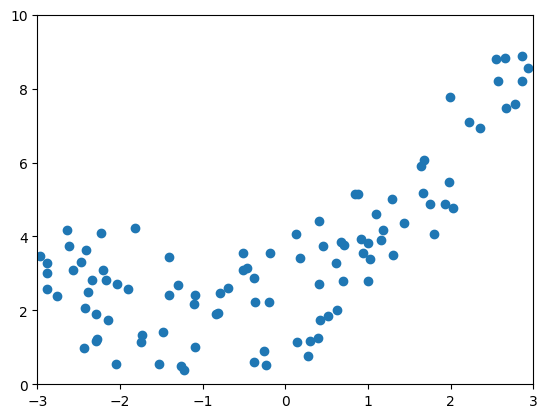

In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.axis([-3,3, 0,10])
plt.scatter(X, y)
plt.show()

Obviously, a straight line would never accurately represent the data plotted. However, a quadratic equation could fit this data, since it was using one of those equations that this data was generated. Once again, we will apply the Normal Equation to the data, using as input matrix $[1, X, X^{2}]$.

In [9]:
X_ = np.c_[np.ones((100, 1)), X, X**2]

theta = np.linalg.inv(X_.T.dot(X_)).dot(X_.T).dot(y)

print(f"a = {theta[2][0]:.2f}")
print(f"b = {theta[1][0]:.2f}")
print(f"c = {theta[0][0]:.2f}")

a = 0.45
b = 0.98
c = 2.34


Using the Normal Equation, we got $a = 0.45$, $b = 0.98$ and $c = 2.34$ which are values close to those used to generate the data. Now, when plotting the data, the traced curve represents the information much better than any linear equation would.

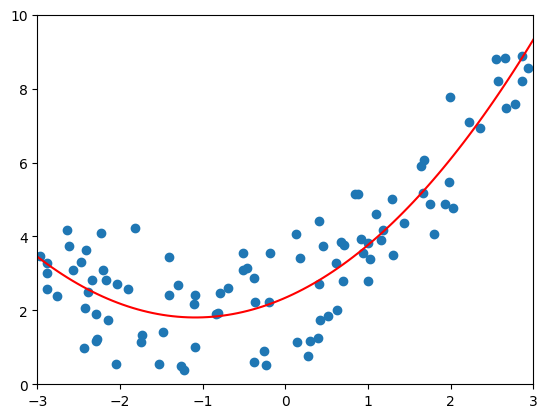

In [10]:
X_visualize = np.linspace(-3, 3, m)
X_visualize_ = np.c_[np.ones(X_visualize.shape), X_visualize, X_visualize**2]
y_visualize = X_visualize_.dot(theta)

plt.axis([-3,3, 0,10])
plt.scatter(X, y)
plt.plot(X_visualize, y_visualize, "red")
plt.show()

This is an example for data that is generated using a quadratic equation. In real world data, it is common to not know the degree of the polynomial that best represents data and the techniques here applied are transversal to polynomials of higher order. Soon it is understood that the more complex the equation is, the smaller is the error to it associated but it does not translate to a better representation of real world data, as will be seen next.

## Learning Curves

To better understand this, we will start by showing different polynomial curves for the same data and how they fit it.

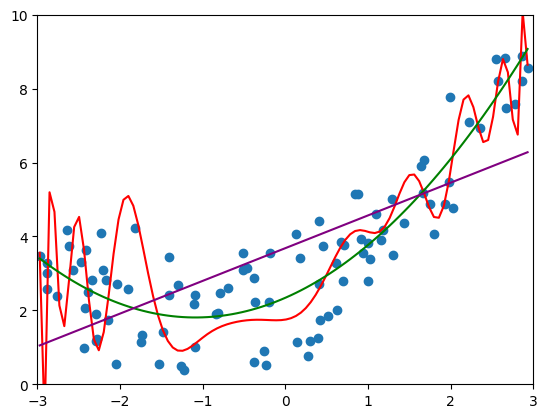

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polynomial_features_30 = PolynomialFeatures(degree=30, include_bias=False)
X_poly_30 = polynomial_features_30.fit_transform(X)
polynomial_features_2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly_2 = polynomial_features_2.fit_transform(X)
polynomial_features_1 = PolynomialFeatures(degree=1, include_bias=False)
X_poly_1 = polynomial_features_1.fit_transform(X)

X_range = np.linspace(min(X), max(X), 100).reshape(-1, 1)
X_poly_range_30 = polynomial_features_30.fit_transform(X_range)
X_poly_range_2 = polynomial_features_2.fit_transform(X_range)

lin_reg_30 = LinearRegression()
lin_reg_30.fit(X_poly_30, y)
theta_30 = np.insert(arr=lin_reg_30.coef_.ravel(), obj=0, values=lin_reg_30.intercept_)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_2, y)
theta_2 = np.insert(arr=lin_reg_2.coef_.ravel(), obj=0, values=lin_reg_2.intercept_)
lin_reg_1 = LinearRegression()
lin_reg_1.fit(X_poly_1, y)
theta_1 = np.insert(arr=lin_reg_1.coef_.ravel(), obj=0, values=lin_reg_1.intercept_)

X_poly_range_30_ = np.c_[np.ones(X_poly_range_30.shape[0]), X_poly_range_30]
y_visualize_30 = X_poly_range_30_.dot(theta_30)
X_poly_range_2_ = np.c_[np.ones(X_poly_range_2.shape[0]), X_poly_range_2]
y_visualize_2 = X_poly_range_2_.dot(theta_2)
X_range_ = np.c_[np.ones(X_range.shape[0]), X_range]
y_visualize_1 = X_range_.dot(theta_1)


plt.axis([-3,3, 0,10])
plt.scatter(X, y)
plt.plot(X_range, y_visualize_30, "red")
plt.plot(X_range, y_visualize_2, "green")
plt.plot(X_range, y_visualize_1, "purple")
plt.show()

To show this, we plotted three polynomial equations: one of degree 1, which is the line in purple, one of degree 2 represented in green, and of degree 30, in red. It is clearly noticeable that in the most extreme points the curve with highest degree is overfitting as it curves awkwardly to match the training points. On the other hand, the line of degree 1 is underfitting, as the training data is not accurately represented by it.

As stated, in real world data, the order of the polynomial that best describes the data is unknown. Therefore, it is left to us to find what is best fitting polynomial degree. If the model performs well in training data but poorly on validation, it is overfitting. Meanwhile, if the model performs poorly on both, it is underfitting. This allows us to understand if the model is too simple or too complex.

One way to check if the model is underfitting or overfitting is through *learning curves*. Learning curves consist of a plot of model's performance on the training set and the validation set as a function of the training set. For this, the model is trained in sets of multiple sizes to which an error is associated.

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m]) 
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m])) 
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.axis([0,80, 0,3])
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train") 
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val") 
    plt.show()

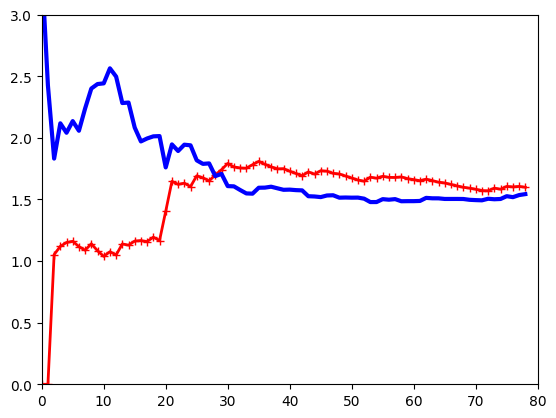

In [13]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

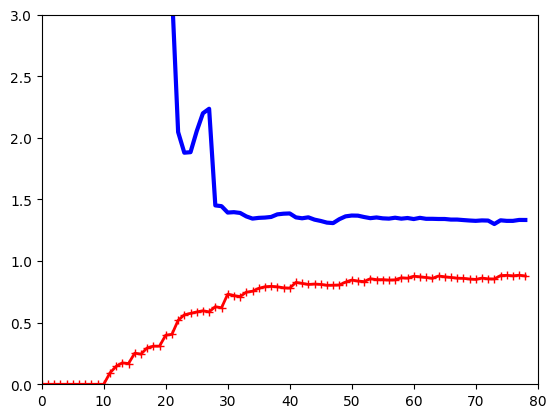

In [14]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", LinearRegression())
))

plot_learning_curves(polynomial_regression, X, y)

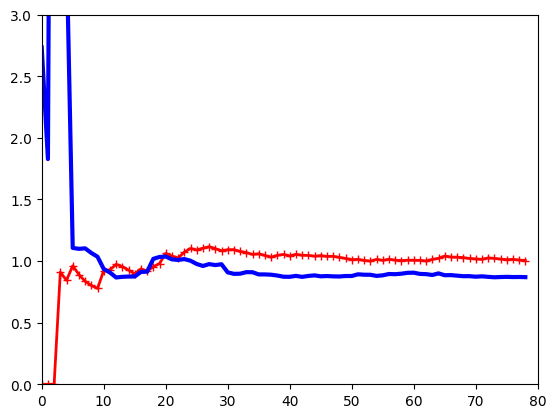

In [15]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("sgd_reg", LinearRegression())
))

plot_learning_curves(polynomial_regression, X, y)

Again, the three models' learning curves were plotted. The first one, describing underfitting, shows close loss values between training and validation, but both are high. In the second model, representing overfitting, the learning curves are far apart even after reaching a plateau. In the third case, with a good fit, the error is low and the training and validation curves are close to each other.

Now, let's interpret these results. In the beginning of each curve, the training error starts with 0 because when only one or two values are seen, it is easy to perfectly fit the curve. However, in the first model, as the linear curve does not fit the model very welland because of the noise added to the training data, as the number of sample increases, the error also increases. The error in the training data, therefore, increases until it reaches a plateau where adding new data does not change the average error. When looking at the error in the validation data, we observe that the model does not generalize well when it is trained with small amounts of data, which explains the high loss seen in the beginning of the training across all models. Therefore, as the model receives more data, the performance improves until it reaches a plateau, limited by the selected model, very close to the values obtained in training. The characteristics here shown are typical of an underfitting model: high error, close curves, and both reached a plateau.

In the second model, the training error is much smaller than the one seen in the first model, but a gap between curves appear. This means that the model performs much better on training data than on validation, which is the meaning of overfitting.

## Bias-Variance Tradeoff

The Bias-Variance Tradeoff is an important concept in Machine Learning, stating that a model's generalization error can be described as a sum of three different errors:

- *Bias*: Generalization error associated with wrong assumptions, such as wrongfully assuming the equation that best describes the data (e.g. assuming a model is described well by a linear equation when it is better represented by a polynomial equation of second degree). A model with high bias is more likely to underfit the data.
- *Variance*: This generalization error is associated with the model's excessive sensitivity to small variations in the training data. This type of error is more commonly associated with a model that contains many degrees of freedom (like the implemented 30 degree model). These models present a high variance and are more likely to overfit the data.
- *Irreductible Error*: This error is associated with the noise present in the data and the only way to reduce it is by directly cleaning up the data, by fixing the data sources or detect and remove outliers.

The reason this is called a tradeoff is because if the model complexity is increased, the bias decreases but the variance increases. In the other hand, if the model complexity is decreased, the bias incraeses but the variance decreases.

## Regularized Linear Models

One of the most popular ways of regularizing a model is by limiting its degrees of freedom. In a linear model, regularization can be achieved by limiting the weights of the model. Three of the most relevant approaches to this problem are the *Ridge Regression*, the *Lasso Regression* and the *Elastic Net*. It is important to note that the regularization terms are added only in the training, not in evaluation. A loss that acts as a good regularizer may not reflect the performance in relevant metrics. Also, the regularized models are sensitive to the scale in which the inputs are presented and may, therefore, be scaled before training. 

### Ridge Regression

Ridge Regression, also known as Tikhonov regularization, is the first example of a regularized linear model here presented. In this case, the loss is regularized by adding a regularization term to the cost function. This regularization term is: $\alpha \sum_{i=1}^{n} \theta_{i}^{2}$. By adding this term to the cost function of the data, we are not only fitting the data, but also motivating the model to keep the weights as small as possible.

The hyperparameter $\alpha$ controls the regularization of the model. In case it is 0, there is no regularization, while if it is a really high value, then the weights tend to zero, and the result is a flat line of intersection equal to the data mean.

The loss function ($J$) is then changed to the following:

$$ J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^{n} \theta_{i}^{2}$$

When the derivative is applied to calculate the gradients, the term $\alpha \sum_{i=1}^{n} \theta_{i}^{2}$ is added to the loss. It is also commonly seen written as $\alpha \frac{1}{2}(||w||_{2})^{2}$ where $||\cdot||_{2}$ represents the $\ell_{2}$ norm of the weight vector (the weight vector, $w$, stands for the array that contains the regression weights, without including the bias). Therefore, for the Ridge Regression, the Gradient Descent can be calculated as:

$$ \nabla_{\theta} = \nabla_{\theta}MSE(\theta) + \nabla_{\theta} \left( \alpha \sum_{i=1}^{n} \theta_{i}^{2} \right) $$

Applying the partial derivative in respect to $\theta$ to the two parts of the sum, we get:
$$ \nabla_{\theta} = \frac{2}{m} X^{T} \cdot (X \cdot \theta - y) + 2\alpha w $$ 

To determine the optimal solution, just like in the linear regression, we must solve the previous equation refering to $\theta$. First, however, we need to re-write $w$ in relation to $\theta$ to make calculations simpler:

$$ 
w = \theta \cdot A \text{, where } 
A = 
\begin{bmatrix}
    0    &    0   &   0    & \dots  \\
    0    &    1   &   0    & \dots  \\
    0    &    0   &   1    & \dots  \\
 \vdots  & \vdots & \vdots & \ddots \\
\end{bmatrix}
$$

Simplifying, what this does is take into account the fact that the bias is not considered in the $\ell_{2}$ regularization. Note that $A$ is of shape $n$ x $n$. Now, let's rewrite our loss function:

$$ 
J(\theta) = \frac{1}{m}(\theta^{T}X - y)^{2} + \alpha (\theta^{T} A \theta) = \\ 
= \frac{1}{m} (\theta^{T}X - y)^{T}(\theta^{T}X - y) + \alpha (\theta^{T} A \theta) = \\
= \frac{1}{m} (\theta^{T}X^{T}X\theta - 2y^{T}X\theta + y^{T}y) + \alpha (\theta^{T} A \theta) = \\
= \frac{1}{m} (\theta^{T}(X^{T}X + m \alpha A)\theta - 2y^{T}X\theta + y^{T}y) \\
$$

Applying the same logic as in the linear regression, we must equate the gradient of the loss to determine the optimal solution:

$$
\nabla_{\theta} = 0 \\
\Leftrightarrow \frac{\partial}{\partial \theta}\left( \frac{1}{m} (\theta^{T}(X^{T}X + m \alpha A)\theta - 2y^{T}X\theta + y^{T}y) \right) = 0 \\
\Leftrightarrow 2 (X^{T}X + m \alpha A) \theta - 2X^{T}y = 0 \\
\Leftrightarrow (X^{T}X + m \alpha A) \theta - X^{T}y = 0 \\
\Leftrightarrow \theta = (X^{T}X + m \alpha A)^{-1} X^{T}y \\
$$ 

It is common to neglect the influence that the sample size has in the parameters, and, sometimes, $m$ may not appear in the equation as $\alpha$ is considered responsible for the changes in the term.

Moving on to the implementation of Ridge Regression on data with a lot of degrees of freedom. We have seen previously that in linear regression, when the number of features increases significantly, the model overfitted. In theory, departing from the same data, the Ridge Regression should lead to a less complex model, by attributing an weight near to zero to most coefficients. However, note that this restriction depends on the $\alpha$ value assigned.

Theta 1: 1.1881085959815842
Theta 2: 0.7115532692735541
Theta 3: 0.41957123774531396
Theta 4: 0.3605248445052291
Theta 5: 0.11508554753217415
Theta 6: 0.20264973103383913
Theta 7: 0.011435096675719672
Theta 8: 0.10407437238004204
Theta 9: -0.022241131626362466
Theta 10: 0.038084251151666505
Theta 11: -0.028225060035959034
Theta 12: -0.005884399987998964
Theta 13: -0.02292868401677596
Theta 14: -0.03364073940730471
Theta 15: -0.014061370274436803
Theta 16: -0.048931890909939824
Theta 17: -0.005631022468734946
Theta 18: -0.054488910252810684
Theta 19: 0.0002612564515914355
Theta 20: -0.05246573485926598
Theta 21: 0.0026097125267596968
Theta 22: -0.044626637551497386
Theta 23: 0.0010645469869259108
Theta 24: -0.03243344861053823
Theta 25: -0.004331625371451759
Theta 26: -0.01709456110192237
Theta 27: -0.013309002680044608
Theta 28: 0.00040033520602951466
Theta 29: -0.02547560043828982
Theta 30: 0.019251171123551444


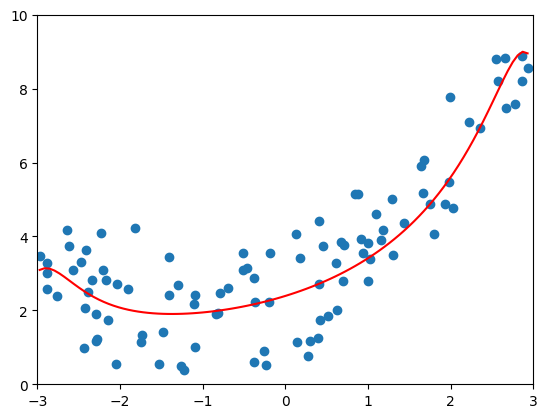

In [60]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

polynomial_features_30 = PolynomialFeatures(degree=30, include_bias=False)
X_poly_30 = polynomial_features_30.fit_transform(X)
X_poly_30 = StandardScaler().fit_transform(X_poly_30)

X_range = np.linspace(min(X), max(X), 100).reshape(-1, 1)
X_poly_range_30 = polynomial_features_30.fit_transform(X_range)
X_poly_range_30 = StandardScaler().fit_transform(X_poly_range_30)

ridge_reg = Ridge(alpha=6, solver="auto")
ridge_reg.fit(X_poly_30, y)
theta_30 = np.insert(arr=ridge_reg.coef_.ravel(), obj=0, values=ridge_reg.intercept_)

X_poly_range_30_ = np.c_[np.ones(X_poly_range_30.shape[0]), X_poly_range_30]
y_visualize_30 = X_poly_range_30_.dot(theta_30)

for i in range(len(ridge_reg.coef_.ravel())):
    print(f"Theta {i + 1}: {ridge_reg.coef_.ravel()[i]}")

plt.axis([-3,3, 0,10])
plt.scatter(X, y)
plt.plot(X_range, y_visualize_30, "red")
plt.show()


Above, we added a small script to implement Ridge Regression and how the $\alpha$ value impacts the resulting prediction. It is an interesting exercise to check which alpha values result in an appropriate curve. It is also interesting to see that, as predicted, the coefficients of the largest order tend to zero as the $\alpha$ value increases. The values that compose the features must however be standardized. Otherwise, some features coefficient's will be valued above other's and no value of $\alpha$ will lead to a good solution.